In [1]:
%load_ext jupyter_black
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import os
import requests
import seaborn as sns

# Data download

Data manually downloaded and renamed from: [ONS](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland)

# Data formatting

In [3]:
from functions.ons import ONS

In [4]:
ons = ONS()

In [5]:
list_file = ons.get_list_datasets()
list_file

['dataset_v0.xlsx',
 'dataset_v1.xlsx',
 'dataset_v2.xlsx',
 'dataset_v3.xlsx',
 'dataset_v4.xlsx',
 'dataset_v5.xlsx',
 'dataset_v6.xlsx',
 'dataset_v7.xlsx',
 'dataset_v8.xlsx']

In [6]:
ds = ons.get_full_dataset(force=True)
ds

dataset_v0.xlsx
dataset_v1.xlsx
dataset_v2.xlsx
dataset_v3.xlsx
dataset_v4.xlsx
dataset_v5.xlsx
dataset_v6.xlsx
dataset_v7.xlsx
dataset_v8.xlsx


<xarray.DataArray (version: 9, death: 3, vax_status: 13, variable: 6, date: 67,
                   age_group: 7)>
array([[[[[[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
...
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]]]]]])
Coordinates:
  * death       (death) object 'All causes' ... 'Non-COVID-19 deaths'
  * vax_status  (vax_status) object 'First dose, at least 21 days ago' ... 'W...
  * variable    (variable) object 'ASMR' ... 'Upper confidence limit'
  * date        (date) datetime64[ns] 2021-01-01 2021-01-08 ... 2023-05-01
  * age_group   (age_group) object '18-39' '40-49' '50-59' ... '80-89' '90+'
  * version     (version) <U2 'v0' 'v1' 'v2' 'v3' 'v4' 'v5' 'v6' 'v7' 'v8'

In [7]:
ons.get_dataset(ons.list_file[1])

<xarray.DataArray (death: 2, vax_status: 4, variable: 5, date: 38)>
array([[[[ 5.2000000e+00,  1.1500000e+01,  1.0700000e+01, ...,
           5.1000000e+00,  4.1000000e+00,  5.8000000e+00],
         [ 3.6000000e+00,  6.3000000e+00,  7.7000000e+00, ...,
           3.1000000e+00,  2.3000000e+00,  3.6000000e+00],
         [ 3.7000000e+01,  1.8300000e+02,  2.6200000e+02, ...,
           2.2000000e+01,  1.8000000e+01,  2.5000000e+01],
         [ 8.9050000e+04,  3.3533400e+05,  5.7049600e+05, ...,
           1.8665650e+06,  1.8192720e+06,  1.7672110e+06],
         [ 7.2000000e+00,  1.6600000e+01,  1.3800000e+01, ...,
           7.9000000e+00,  6.6000000e+00,  8.7000000e+00]],

        [[ 2.5000000e+00,  4.0000000e+00,  4.4000000e+00, ...,
                     nan,            nan,            nan],
         [ 1.6000000e+00,  3.1000000e+00,  3.8000000e+00, ...,
                     nan,            nan,            nan],
         [ 1.5700000e+02,  3.1000000e+02,  6.0000000e+02, ...,
           1.0000000e+00,  0.0000000e+00,  1.0000000e+00],
         [ 1.2008180e+06,  2.1126430e+06,  3.6420790e+06, ...,
           4.5077100e+05,  2.9799400e+05,  2.3558600e+05],
         [ 3.3000000e+00,  4.8000000e+00,  5.0000000e+00, ...,
...
           1.8500000e+01,  1.6500000e+01,            nan],
         [-3.0000000e-01,  4.0000000e-01,  3.2000000e+00, ...,
           1.8100000e+01,  1.6200000e+01,            nan],
         [ 1.8000000e+01,  1.0100000e+02,  1.6600000e+02, ...,
           7.6420000e+03,  6.8330000e+03,            nan],
         [ 2.6803600e+05,  4.0061600e+05,  4.0722000e+05, ...,
           2.9063304e+07,  2.9326803e+07,            nan],
         [ 4.0000000e+00,  6.8000000e+00,  7.9000000e+00, ...,
           1.8900000e+01,  1.6900000e+01,            nan]],

        [[ 3.6500000e+01,  5.0800000e+01,  8.1800000e+01, ...,
           3.1600000e+01,  2.6800000e+01,            nan],
         [ 3.5800000e+01,  4.9900000e+01,  8.0300000e+01, ...,
           2.8700000e+01,  2.4000000e+01,            nan],
         [ 1.2268000e+04,  1.3052000e+04,  1.2696000e+04, ...,
           5.0800000e+02,  4.2600000e+02,            nan],
         [ 3.7800436e+07,  3.6506913e+07,  3.4731280e+07, ...,
           7.7848450e+06,  7.7129970e+06,            nan],
         [ 3.7200000e+01,  5.1700000e+01,  8.3400000e+01, ...,
           3.4600000e+01,  2.9500000e+01,            nan]]]])
Coordinates:
  * death       (death) object 'Deaths involving COVID-19' 'Non-COVID-19 deaths'
  * vax_status  (vax_status) object 'First dose, at least 21 days ago' ... 'U...
  * variable    (variable) object 'ASMR' ... 'Upper confidence limit'
  * date        (date) datetime64[ns] 2021-01-08 2021-01-15 ... 2021-09-24

# Data observation

In [8]:
ds = xr.open_dataarray("data/ONS_dataset.nc")
ds = ds.resample(date="M").mean()
ds

<xarray.DataArray (version: 9, death: 3, vax_status: 13, variable: 6, date: 29,
                   age_group: 7)>
array([[[[[[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
...
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]]]]]])
Coordinates:
  * death       (death) <U25 'All causes' ... 'Non-COVID-19 deaths'
  * vax_status  (vax_status) <U45 'First dose, at least 21 days ago' ... 'Wit...
  * variable    (variable) <U22 'ASMR' ... 'Upper confidence limit'
  * age_group   (age_group) <U5 '18-39' '40-49' '50-59' ... '80-89' '90+'
  * version     (version) <U2 'v0' 'v1' 'v2' 'v3' 'v4' 'v5' 'v6' 'v7' 'v8'
  * date        (date) datetime64[ns] 2021-01-31 2021-02-28 ... 2023-05-31

In [9]:
ds_grouped = ons.group_vax_status(ds)
ds_grouped_binary = ons.group_vax_status(ds, binary=True)

## Person-years

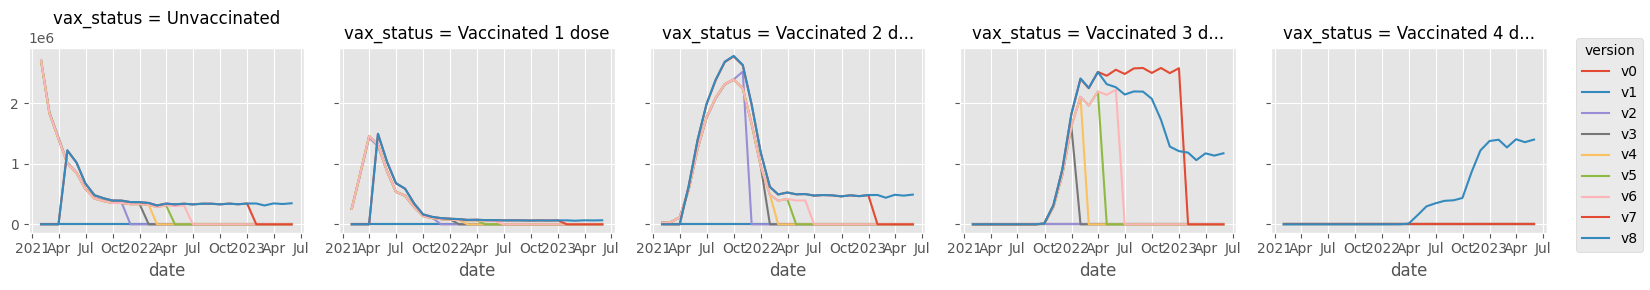

In [10]:
ds_grouped.sel(variable="Person-years").sum(dim="age_group").sel(
    death="All causes"
).plot(col="vax_status", hue="version")

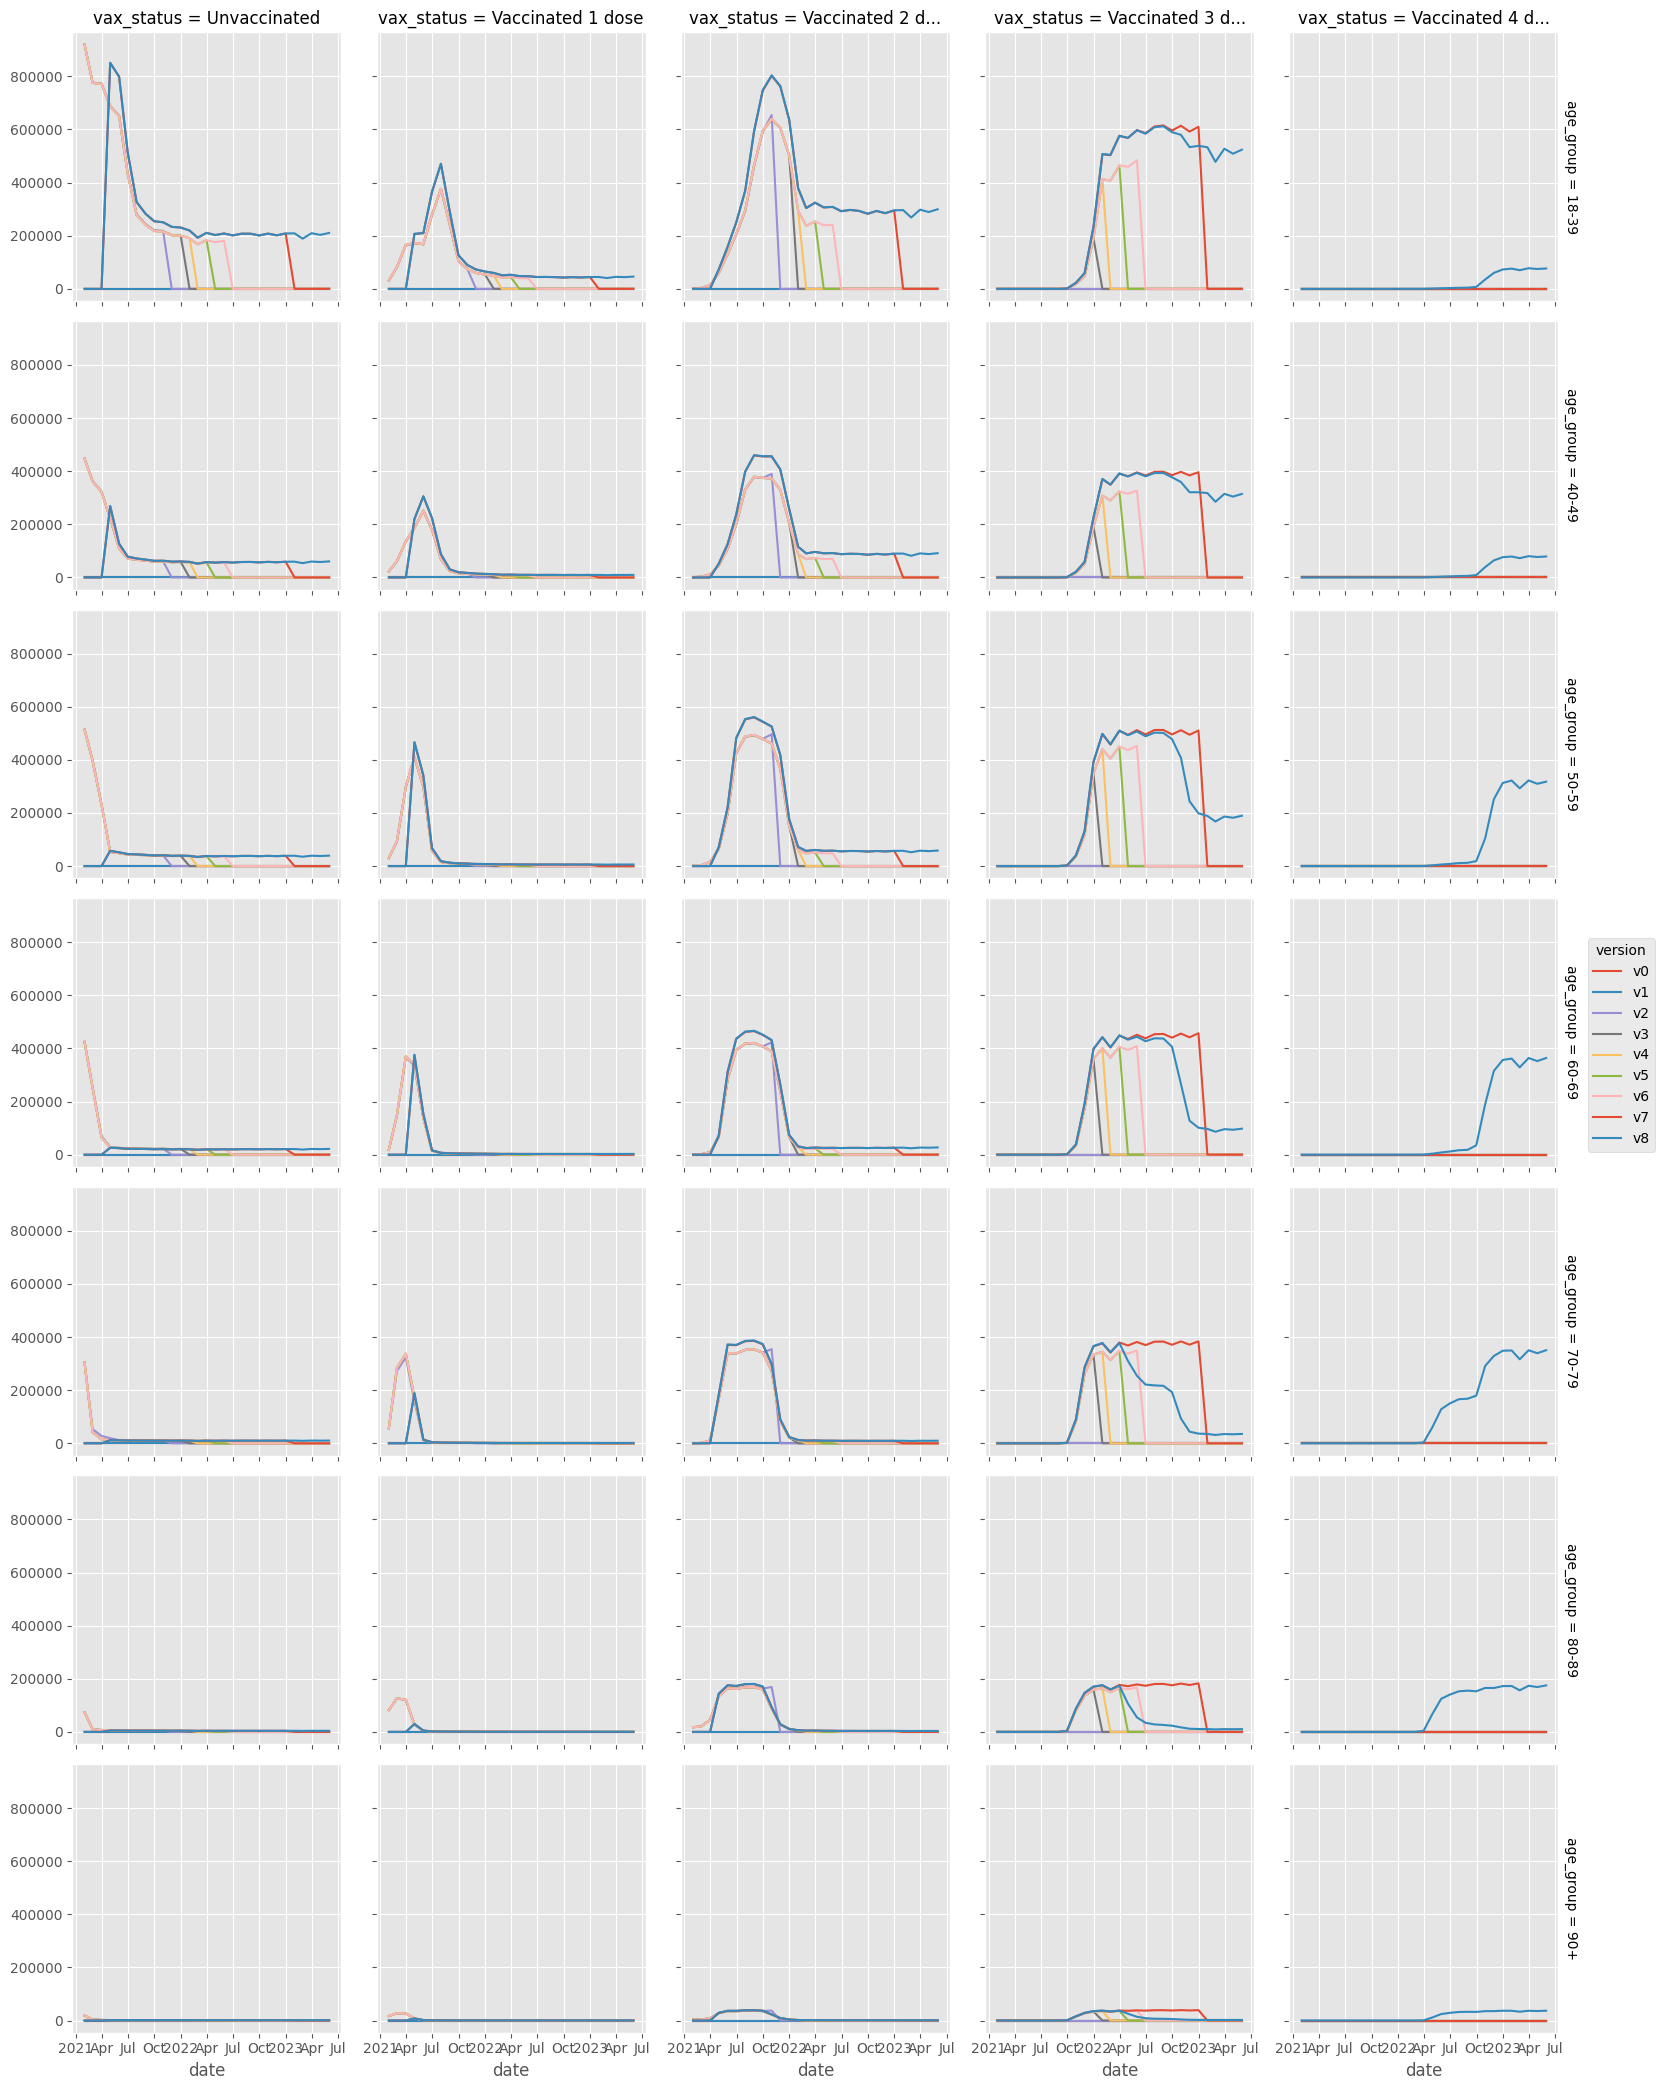

In [11]:
ds_grouped.sel(variable="Person-years").sel(death="All causes").plot(
    col="vax_status", hue="version", row="age_group"
)

## Number of deaths

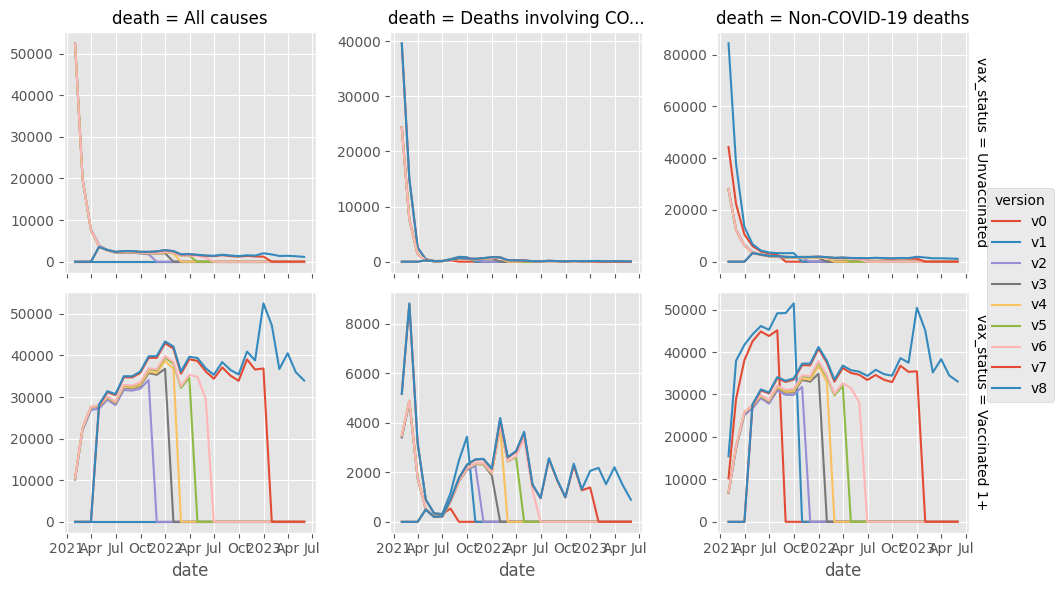

In [12]:
ds_grouped_binary.sel(variable="Number of deaths").sum(dim="age_group").plot(
    row="vax_status", hue="version", col="death", sharey=False
)

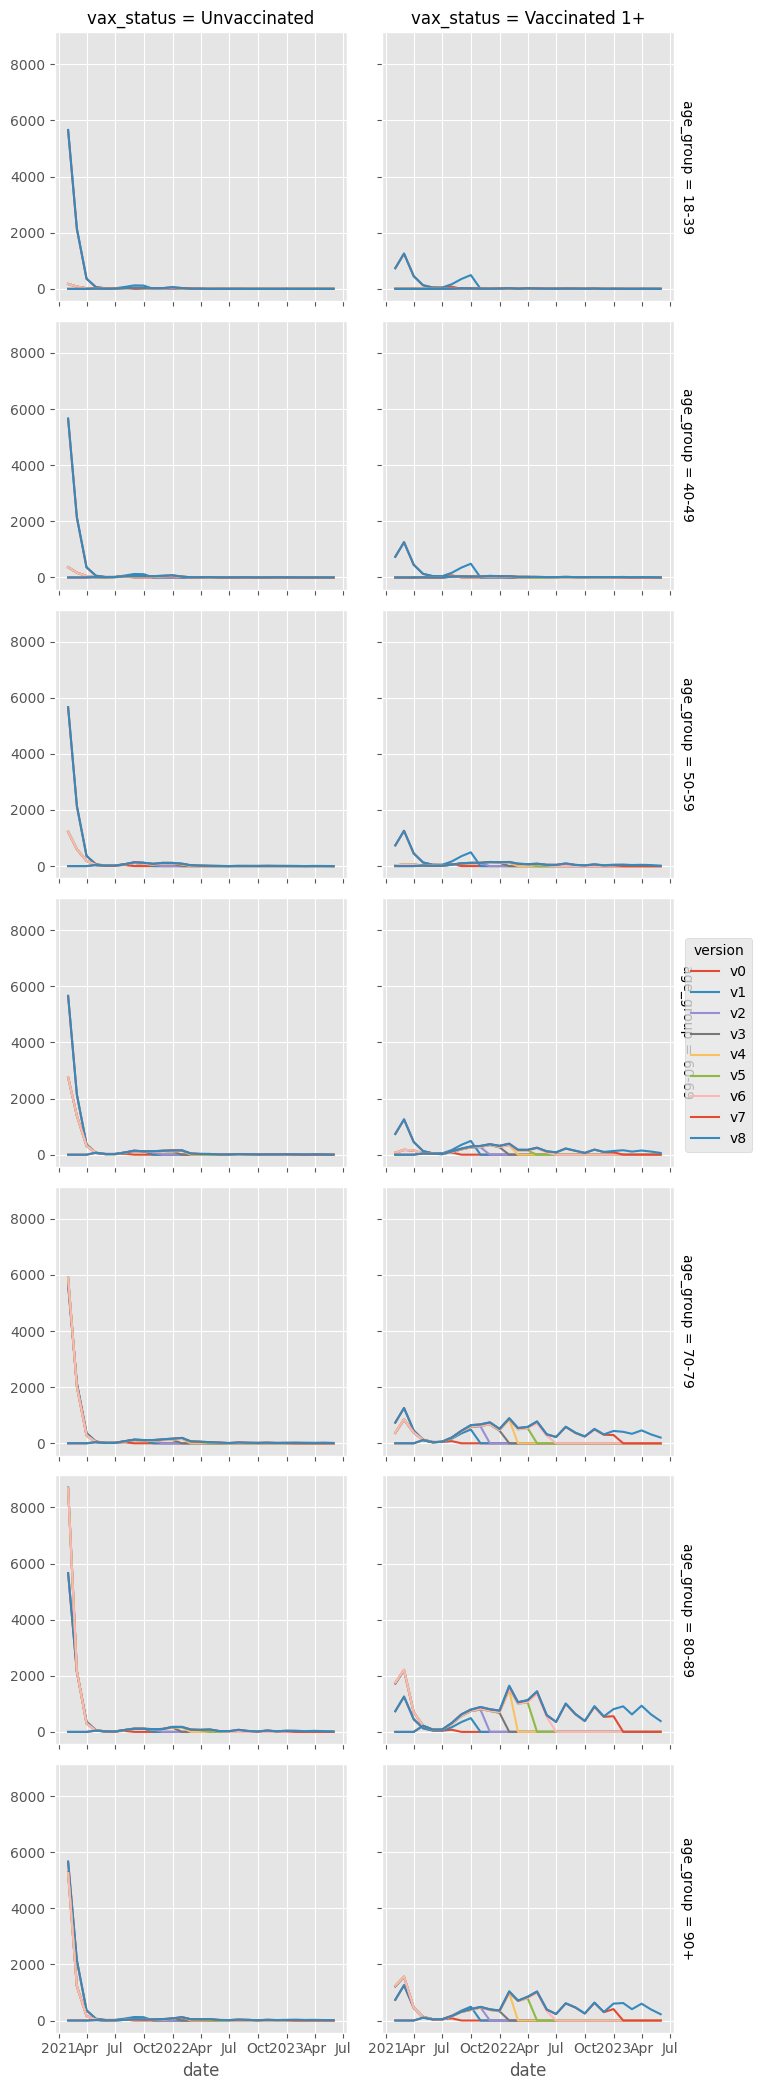

In [13]:
ds_grouped_binary.sel(variable="Number of deaths").sel(
    death="Deaths involving COVID-19"
).plot(
    row="age_group",
    hue="version",
    col="vax_status",
)

## ASMR

- Warning: don't use the grouped dataset as ASMR can't be summed like this.

In [14]:
ds.vax_status

<xarray.DataArray 'vax_status' (vax_status: 13)>
array(['First dose, at least 21 days ago', 'First dose, less than 21 days ago',
       'Fourth dose or booster, at least 21 days ago',
       'Fourth dose or booster, less than 21 days ago', 'Second dose',
       'Second dose, at least 21 days ago',
       'Second dose, less than 21 days ago',
       'Third dose or booster, at least 21 days ago',
       'Third dose or booster, less than 21 days ago', 'Unvaccinated',
       'Within 21 days of first dose', 'Within 21 days of second dose',
       'Within 21 days of third dose or booster'], dtype='<U45')
Coordinates:
  * vax_status  (vax_status) <U45 'First dose, at least 21 days ago' ... 'Wit...

In [15]:
list_main_vax_status = [
    "Unvaccinated",
    "First dose, less than 21 days ago",
    "First dose, at least 21 days ago",
    "Second dose, less than 21 days ago",
    "Second dose, at least 21 days ago",
    "Third dose or booster, less than 21 days ago",
    "Third dose or booster, at least 21 days ago",
    "Fourth dose or booster, less than 21 days ago",
    "Fourth dose or booster, at least 21 days ago",
]
list_main_vax_status2 = [
    vax_status for vax_status in list_main_vax_status if "less than" not in vax_status
]

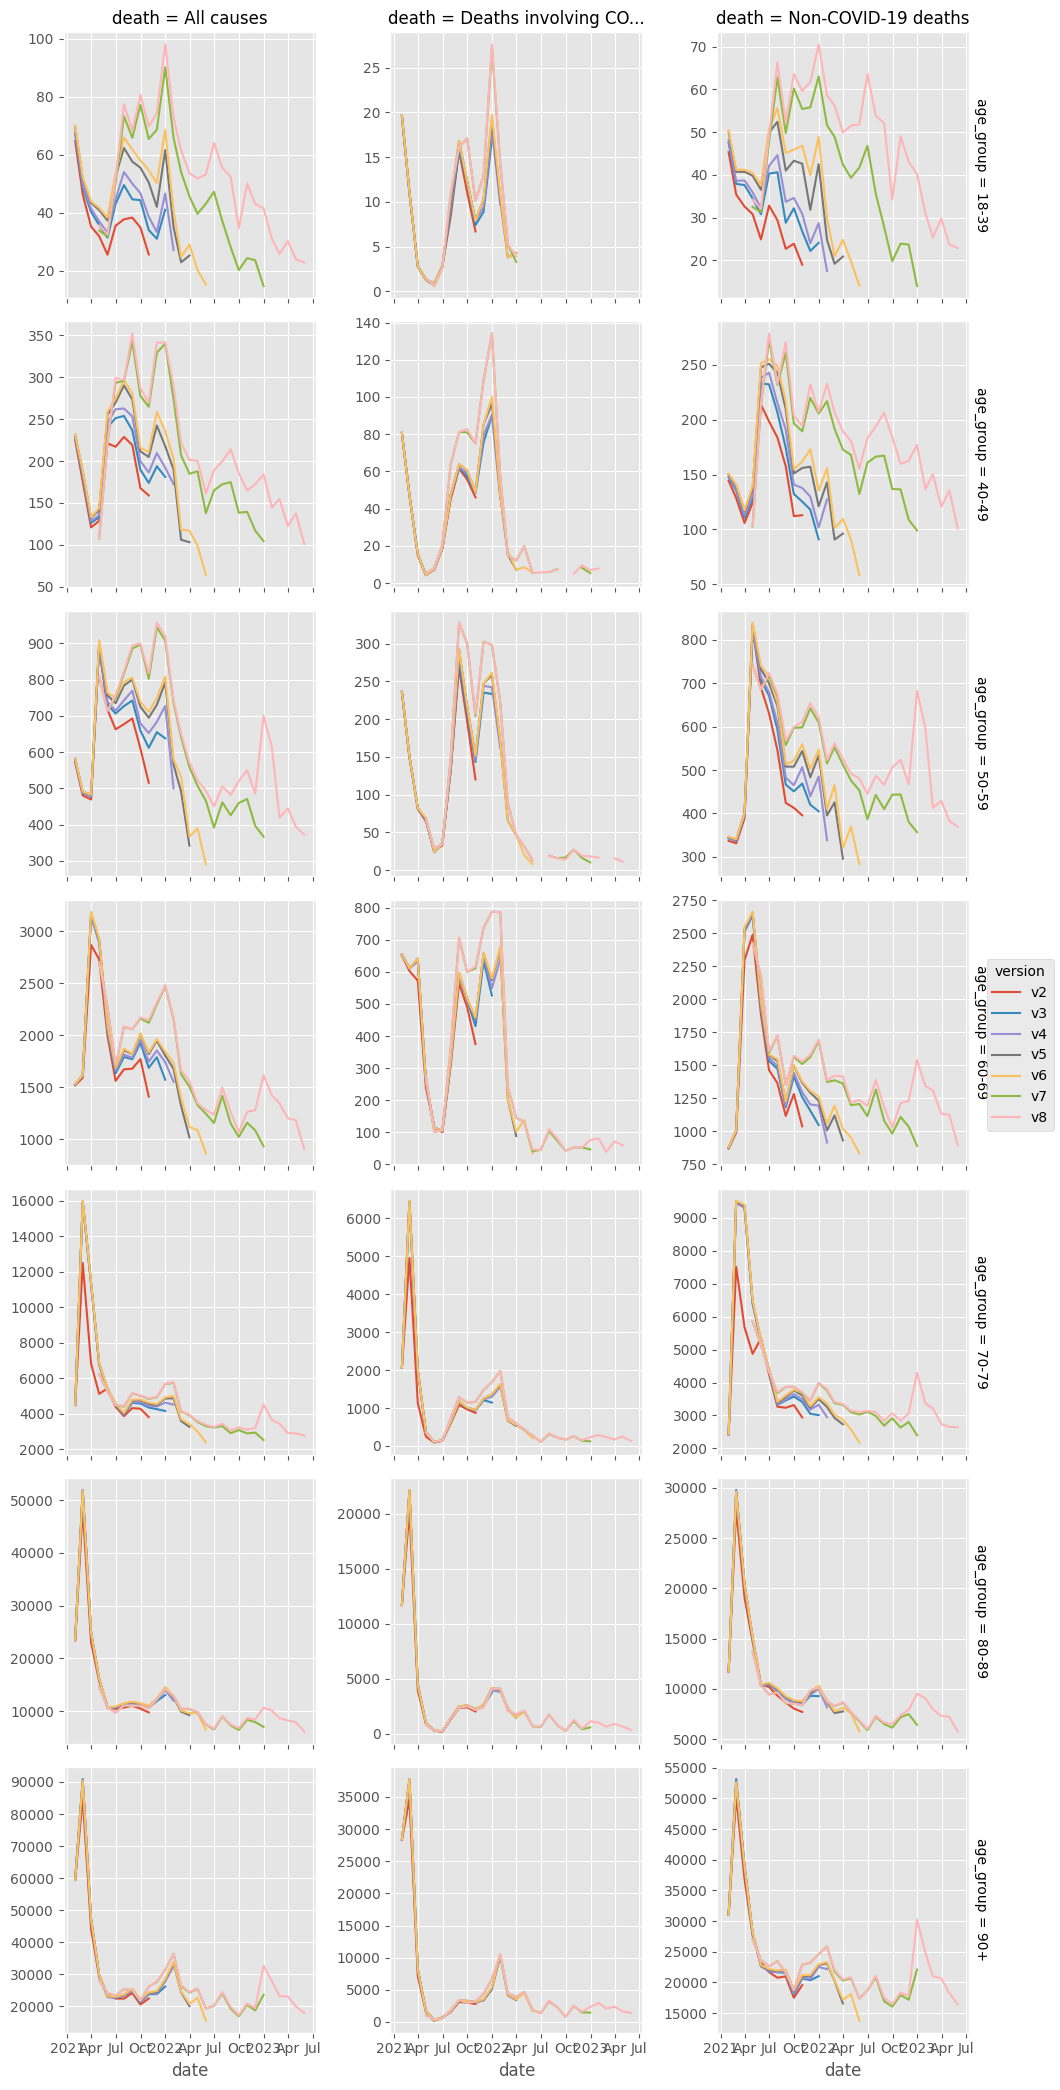

In [16]:
ds.sel(variable="ASMR", vax_status="Unvaccinated", version=ds.version.values[2:]).plot(
    row="age_group", hue="version", col="death", sharey=False
)

- Data absolutely not reliable at the time their are realeased...

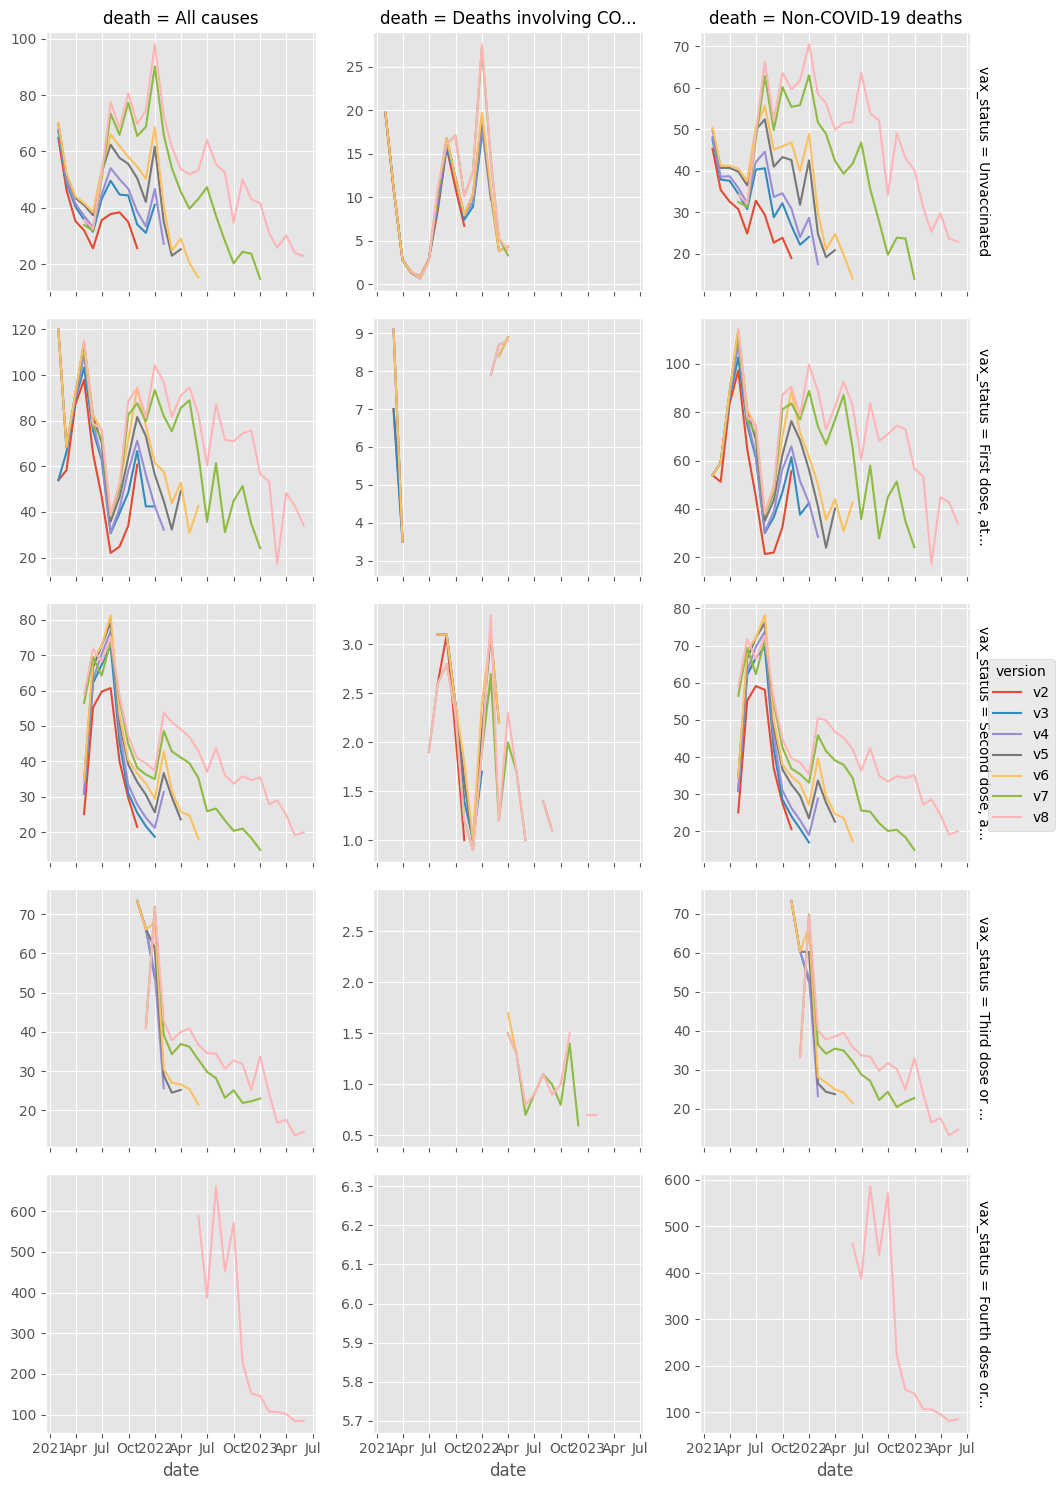

In [17]:
ds.sel(
    variable="ASMR",
    vax_status=list_main_vax_status2,
    version=ds.version.values[2:],
    age_group="18-39",
).plot(row="vax_status", hue="version", col="death", sharey=False)

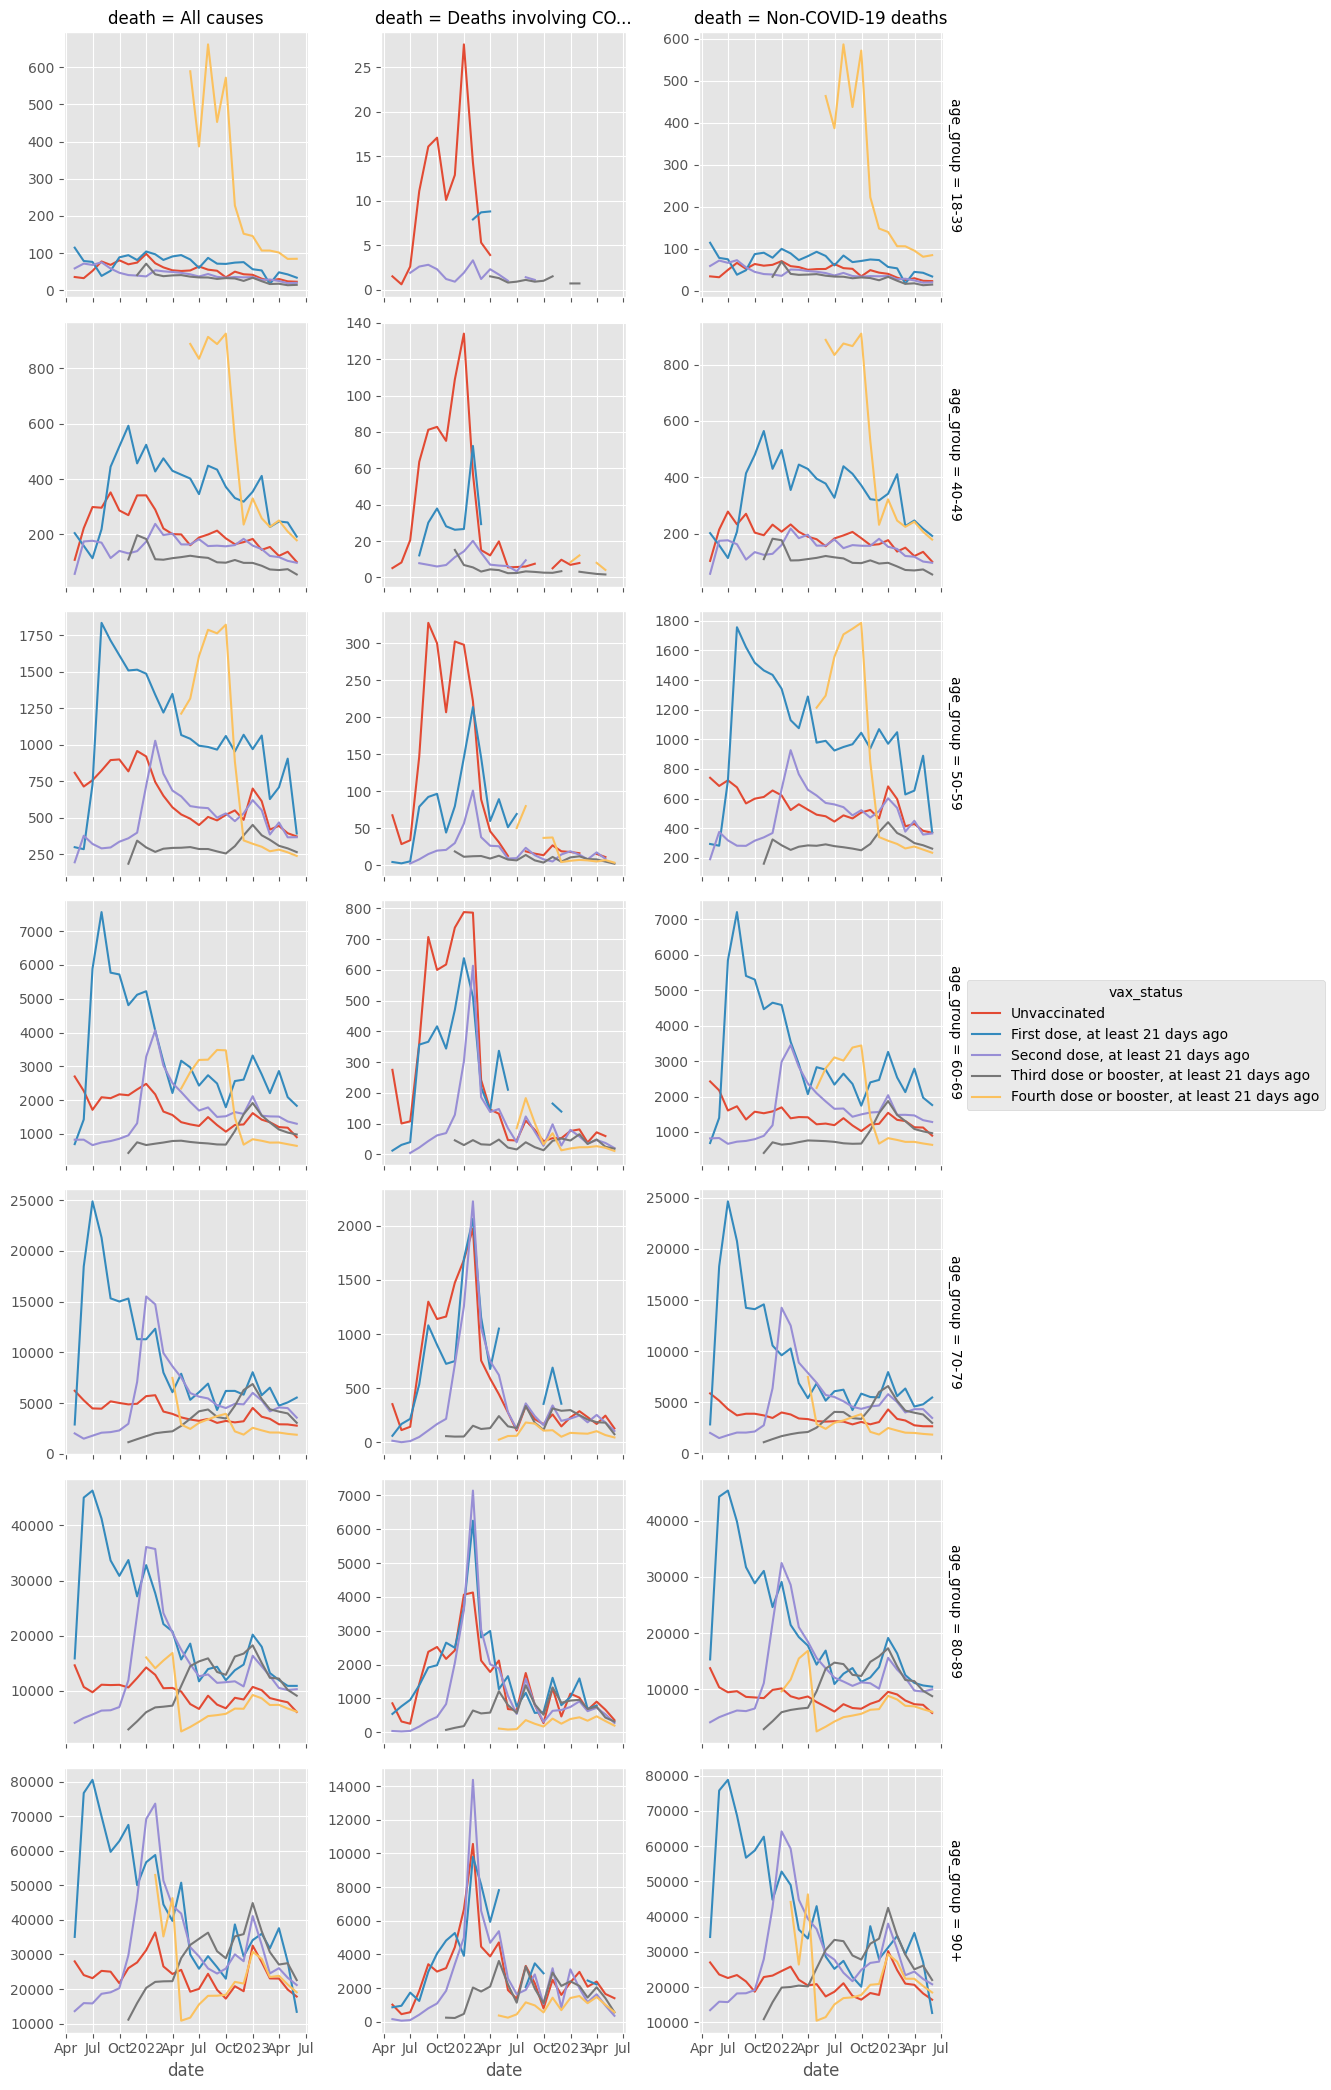

In [18]:
ds.sel(
    variable="ASMR",
    version="v8",
    vax_status=list_main_vax_status2,
).plot(row="age_group", hue="vax_status", col="death", sharey=False)

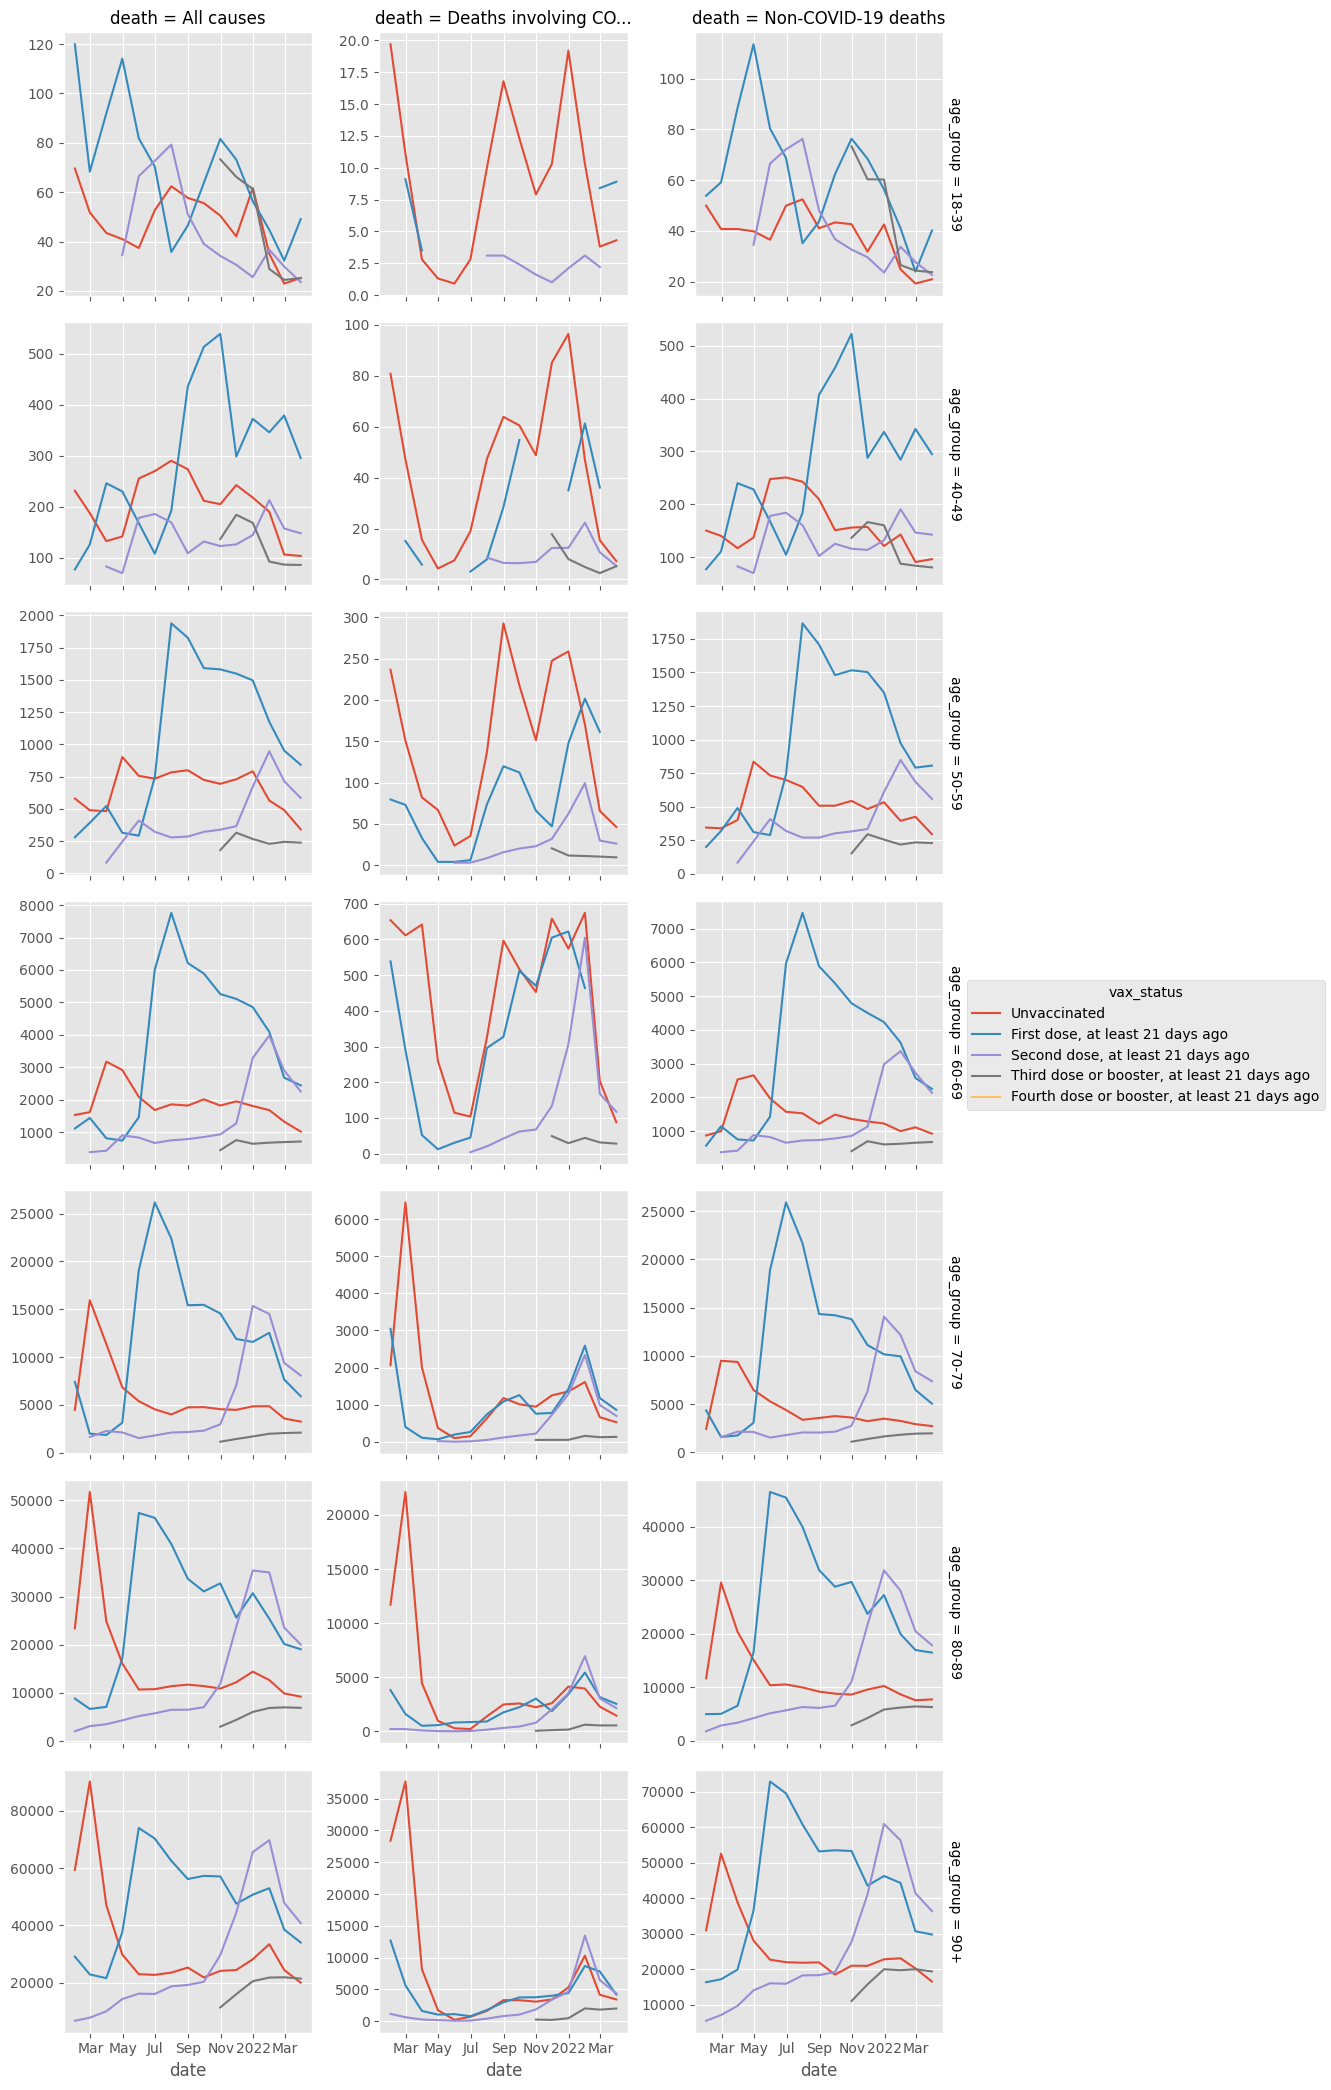

In [19]:
ds.sel(
    variable="ASMR",
    version="v5",
    vax_status=list_main_vax_status2,
).plot(row="age_group", hue="vax_status", col="death", sharey=False)

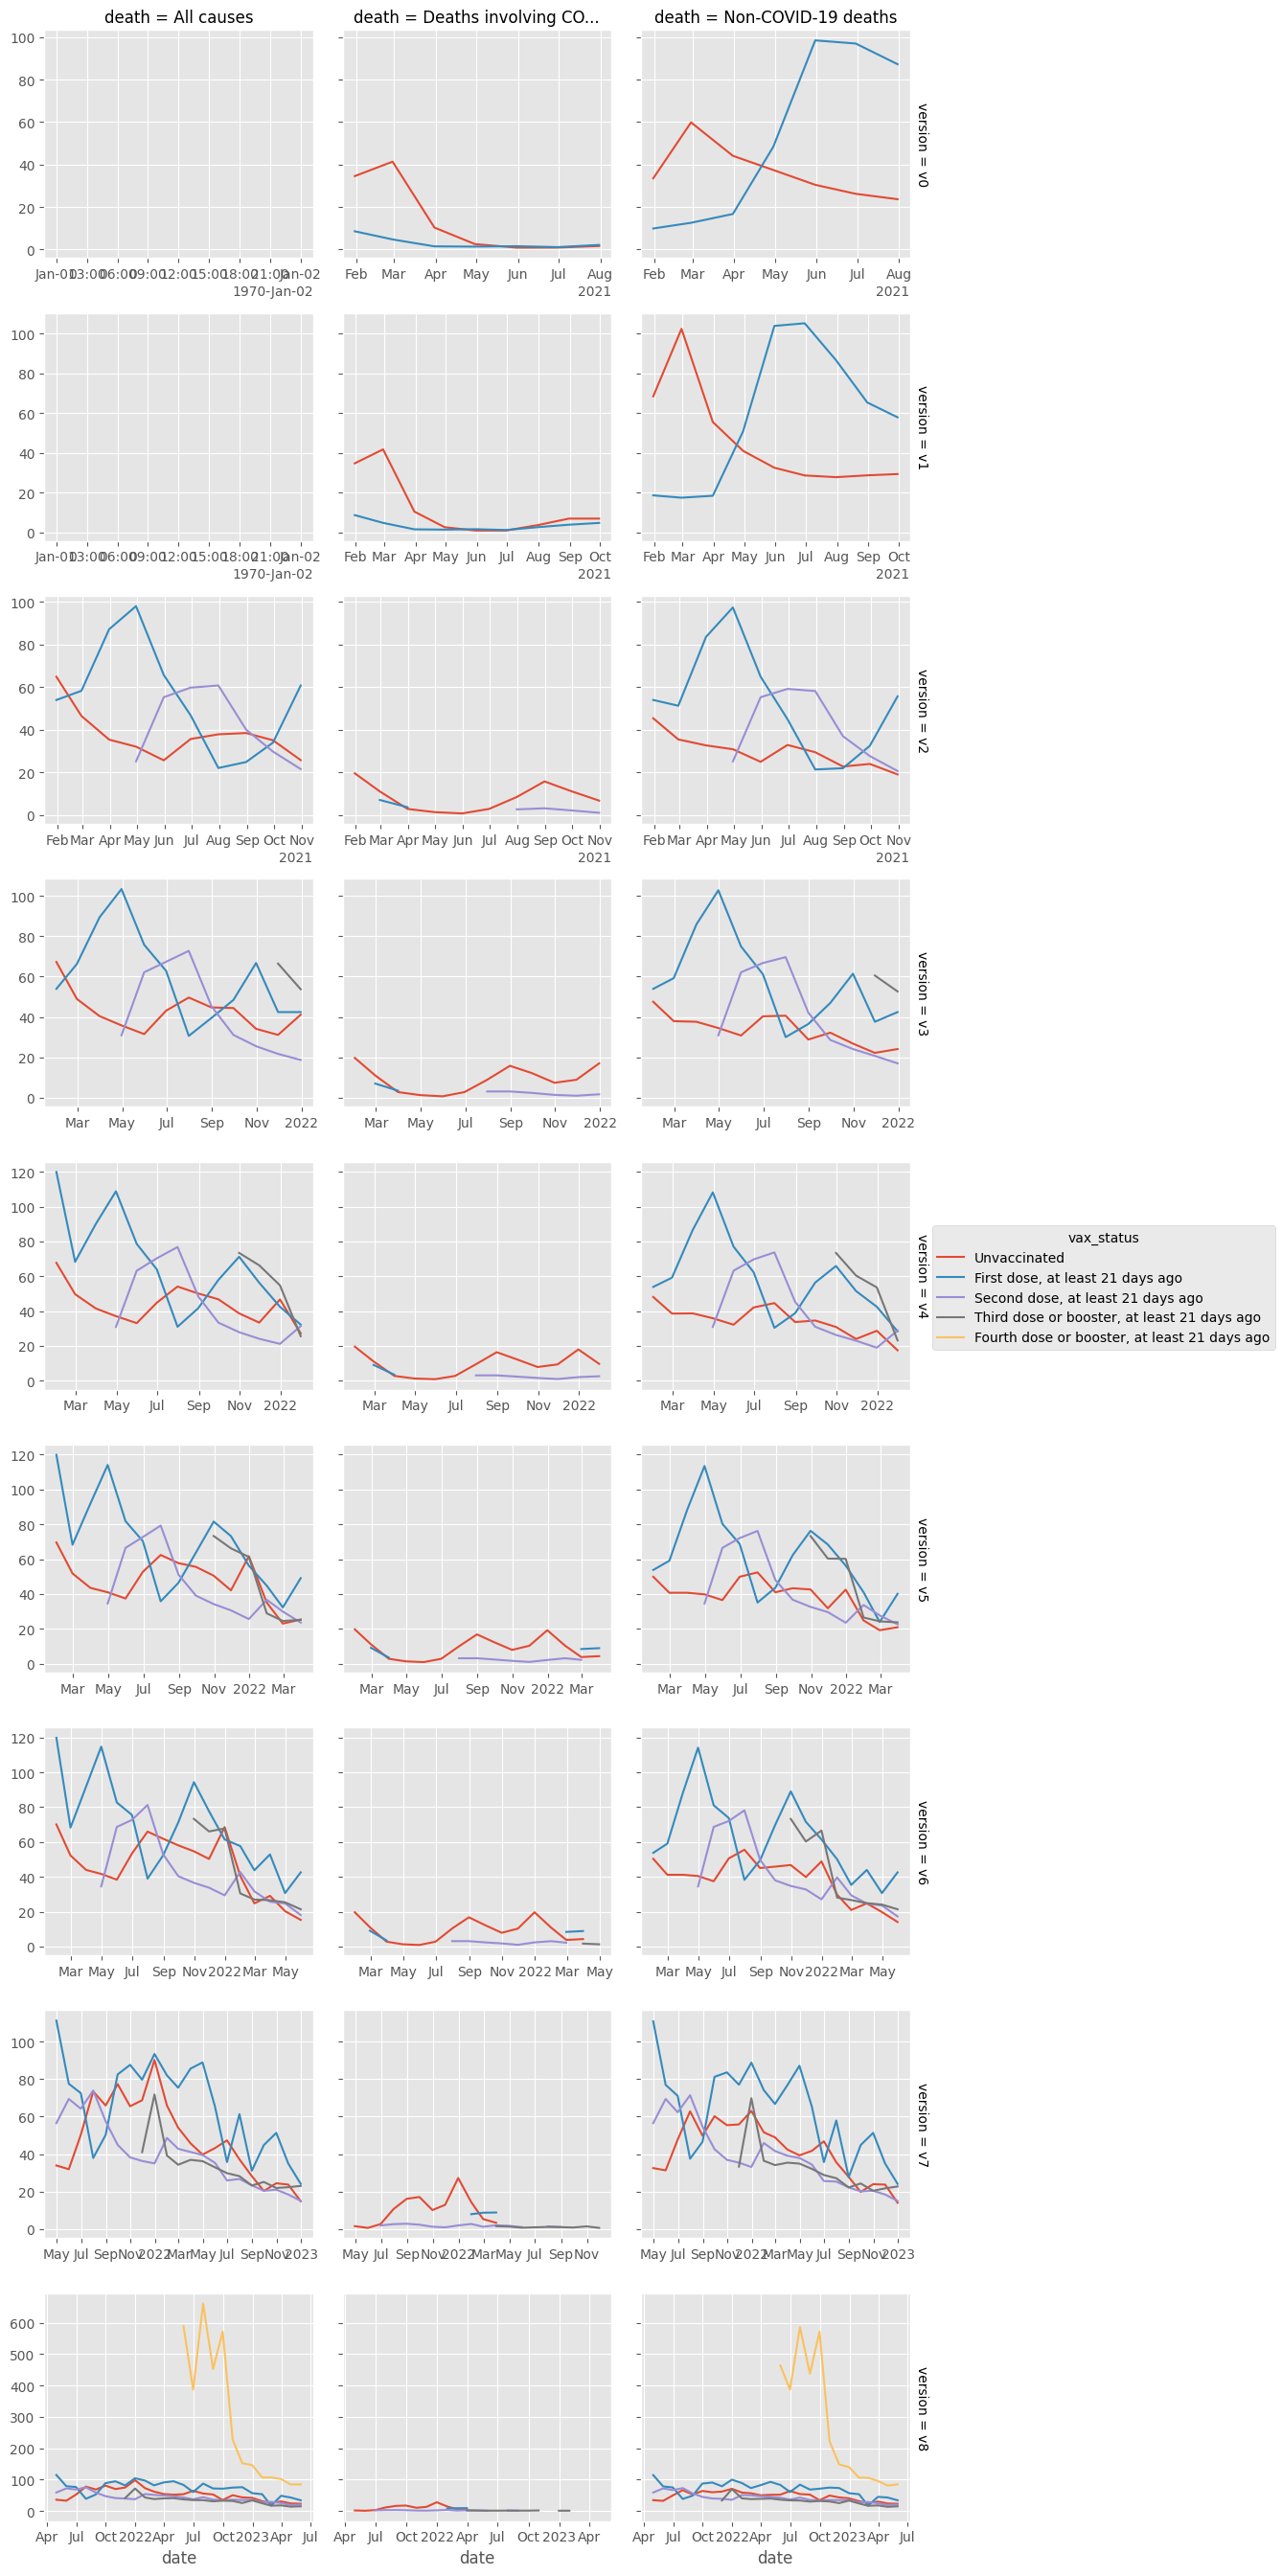

In [20]:
ds.sel(
    variable="ASMR",
    age_group="18-39",
    vax_status=list_main_vax_status2,
).plot(row="version", hue="vax_status", col="death", sharey="row", sharex=False)

In [21]:
ds

<xarray.DataArray (version: 9, death: 3, vax_status: 13, variable: 6, date: 29,
                   age_group: 7)>
array([[[[[[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
...
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]],

          [[           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           ...,
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan],
           [           nan,            nan,            nan, ...,
                       nan,            nan,            nan]]]]]])
Coordinates:
  * death       (death) <U25 'All causes' ... 'Non-COVID-19 deaths'
  * vax_status  (vax_status) <U45 'First dose, at least 21 days ago' ... 'Wit...
  * variable    (variable) <U22 'ASMR' ... 'Upper confidence limit'
  * age_group   (age_group) <U5 '18-39' '40-49' '50-59' ... '80-89' '90+'
  * version     (version) <U2 'v0' 'v1' 'v2' 'v3' 'v4' 'v5' 'v6' 'v7' 'v8'
  * date        (date) datetime64[ns] 2021-01-31 2021-02-28 ... 2023-05-31

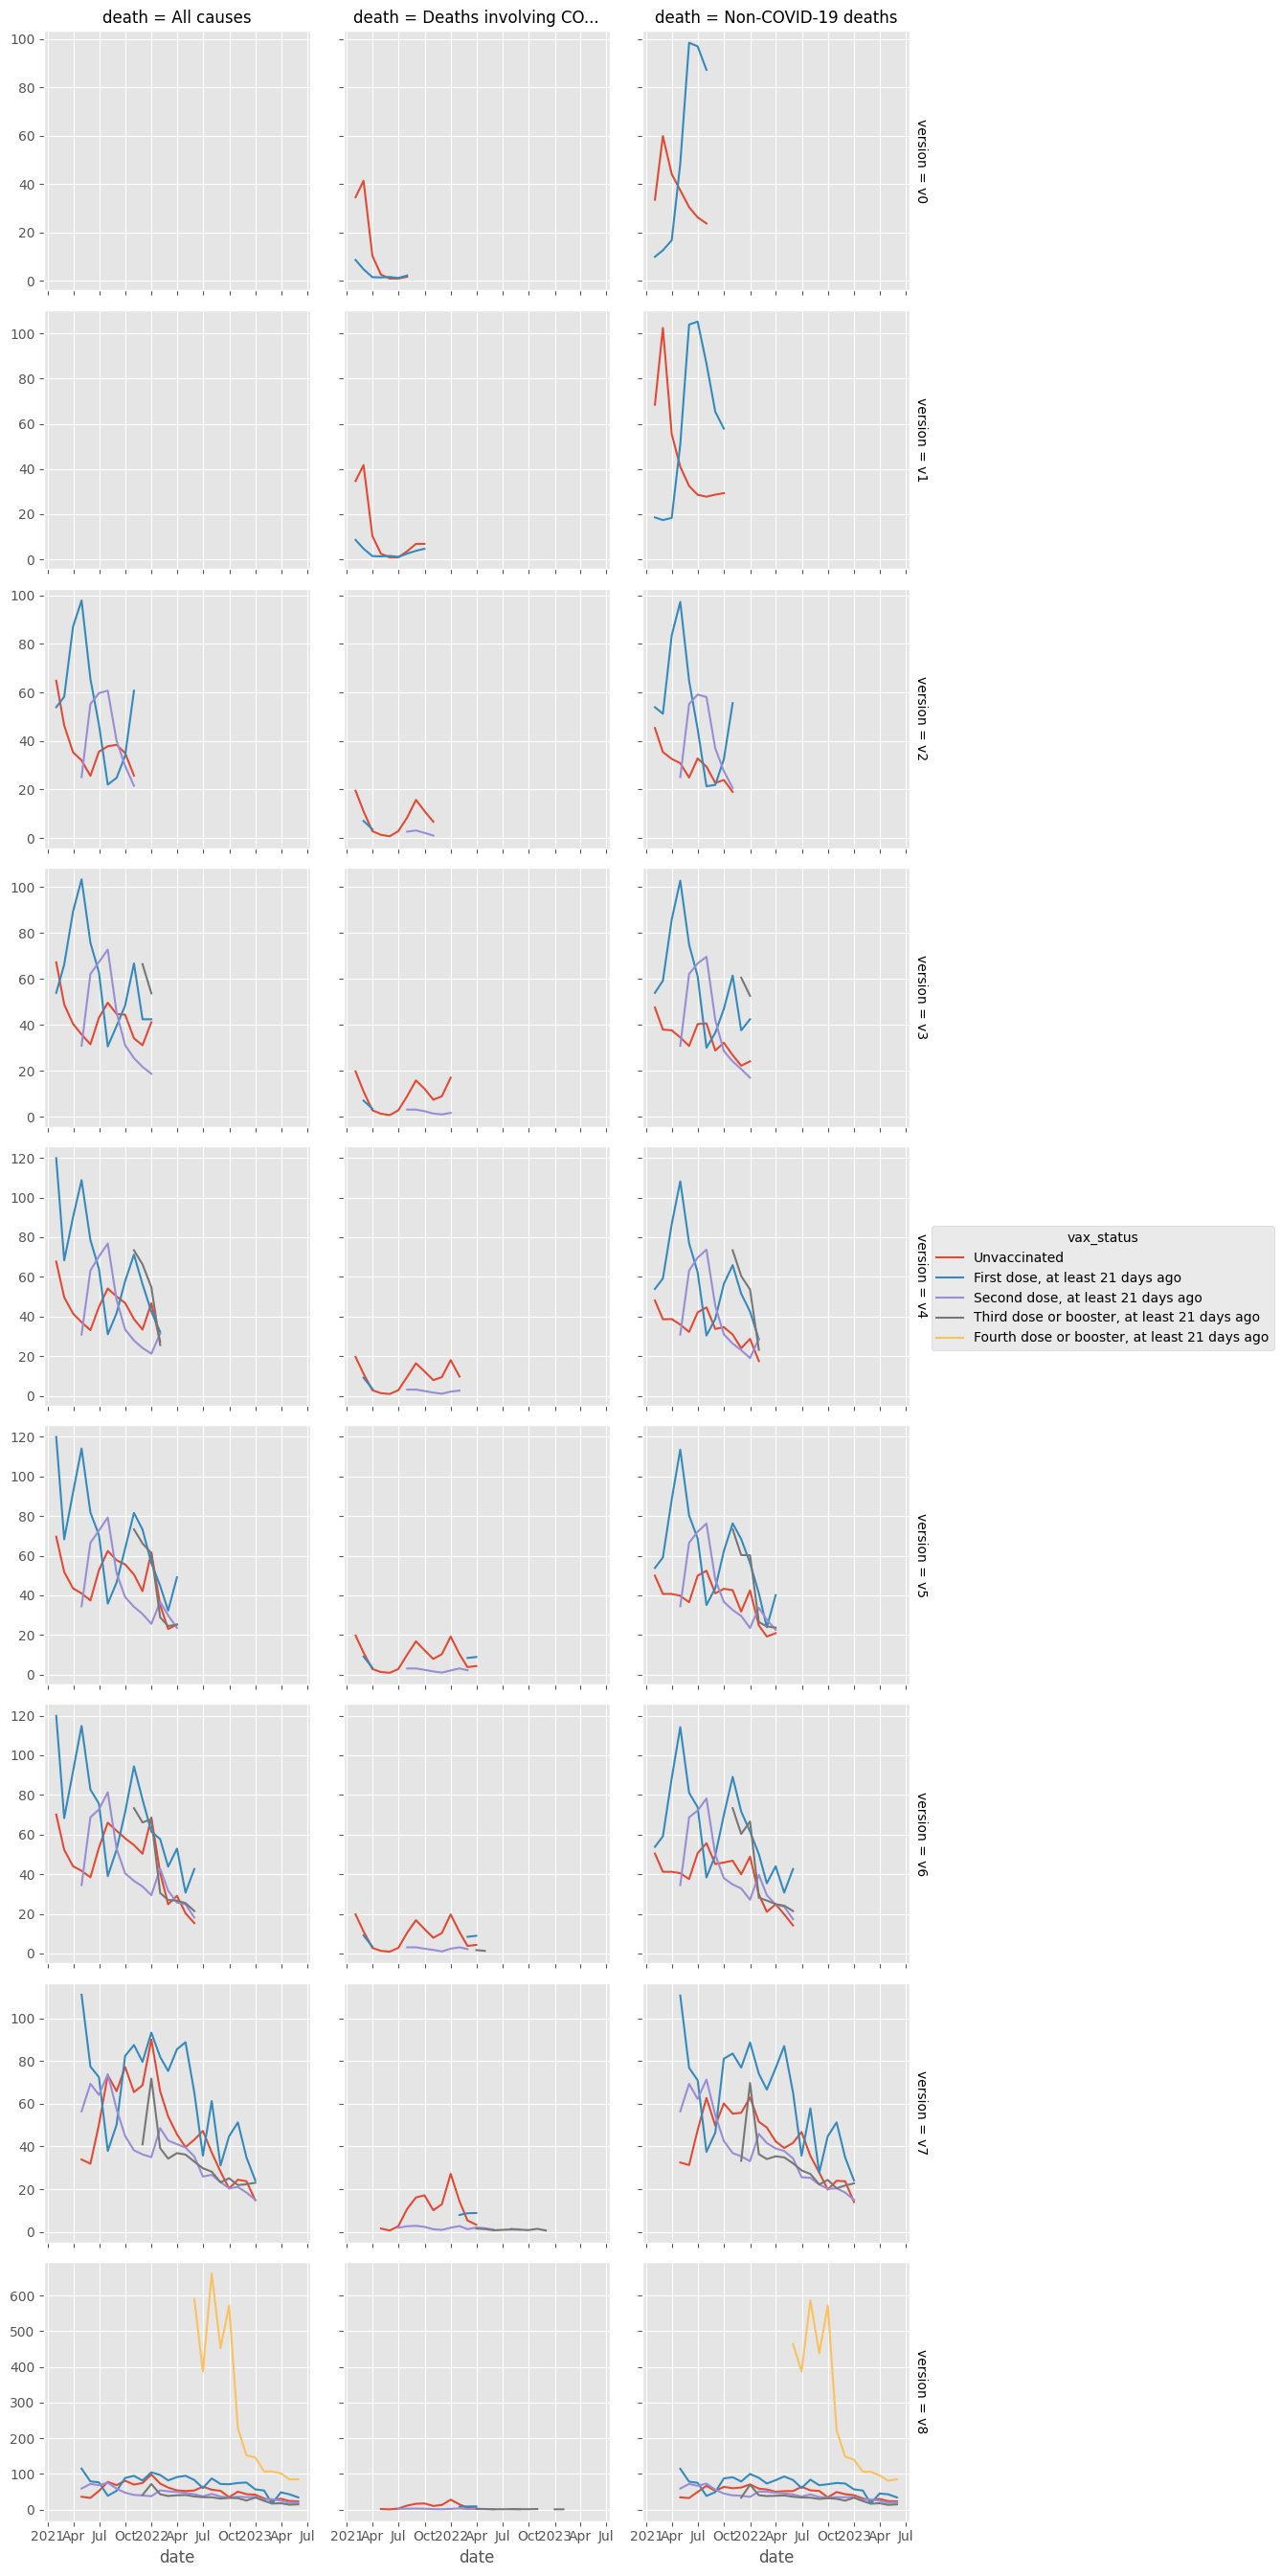

In [22]:
ds.sel(
    variable="ASMR",
    age_group="18-39",
    vax_status=list_main_vax_status2,
).plot(row="version", hue="vax_status", col="death", sharey="row")